In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df = pd.read_csv('data/iris.csv')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


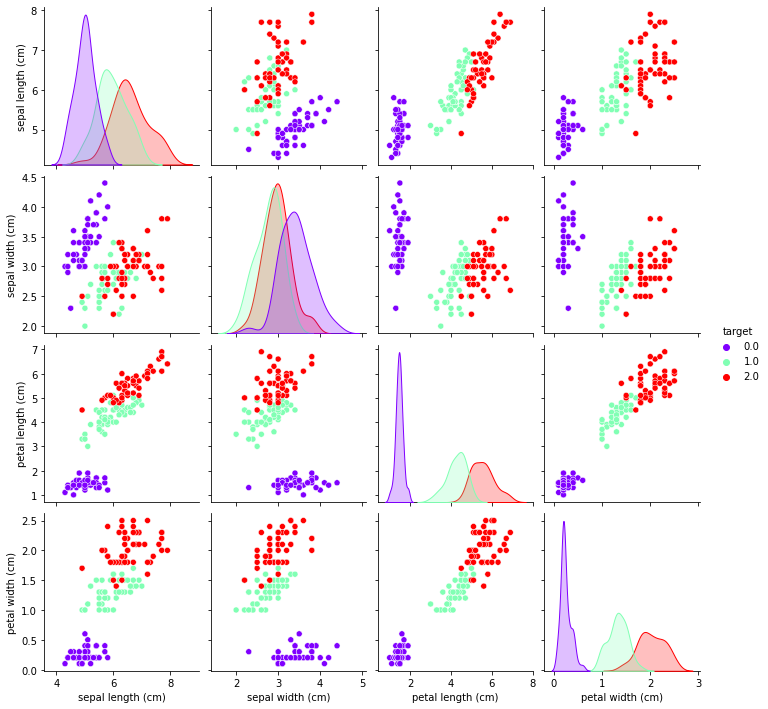

In [7]:
sns.pairplot(df, hue = 'target', palette='rainbow')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


In [10]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values #With 'values' it is going to be a numpy array
y = df['target'].values

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [44]:
#help(Sequential)

In [54]:
#OR BETTER
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [55]:
# encode class values as integers
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [56]:
model.fit(x = X_train, y = y_train, epochs = 200, verbose = 0)
#model.evaluate(X_test, y_test, verbose=0)

<AxesSubplot:>

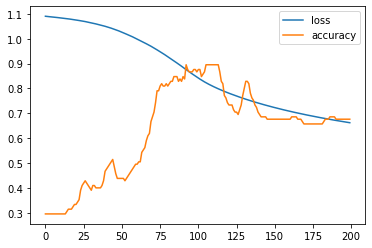

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
model.evaluate(X_test, y_test, verbose = 0)

[0.5623918175697327, 0.7111111283302307]

In [59]:
model.evaluate(X_train, y_train, verbose= 0)

[0.6613816022872925, 0.6666666865348816]

In [38]:
test_predictions = model.predict(X_test)

In [22]:
#test_predictions